<a href="https://colab.research.google.com/github/Cbilinski/AstroDeepLearning_Hackathon/blob/main/UArizona_Deep_Learning_Hackathon_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Deep Learning Hackathon Tutorial</h1>
<h2>Steward Observatory, University of Arizona</h2>
<p>Friday, February 2, 2024</p>
<p>Written by Ansh Gupta (anshrg@arizona.edu)</p>



In [ ]:
# Let's run our imports while we learn about Google Colab!
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn.functional as F
from tqdm.notebook import tqdm

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

Google Colab is a cloud computing platform that is useful for a wide variety of applications. As you can see, it's a really nice way to share and collaborate on code notebooks. Colab is especially well-suited to applications in machine learning.

As you learned from Jackson, neural networks leverage A LOT of linear algebra. Practically, this means that machine learning frameworks are implemented in terms of vectors and matrices. In order to train and evaluate a model, your computer has to do a truly staggering number of operations like matrix multiplication, diagonalization, etc. In order to complete the tasks we want to in a reasonable amount of time, we need to use a special chip which is suited to these kinds of tasks. Conveniently, Google Colab fulfills this purpose by providing free access to a set of GPUs.

Our first step is to make sure we're actually connected to a GPU. Open the **Runtime** tab in the top menu and click "Change Runtime Type". Make sure that it says "Python 3" under **Runtime Type** (it should already be set). Under **Hardware Accelerator**, click on the button that says "T4 GPU". This is the free GPU that we can use to run our machine learning commands. Make sure you press "Save" afterwards! You can run the next cell to make sure you did it right.

In [ ]:
# Check if the user is using the T4 GPU
if torch.cuda.is_available():
    print("You successfully switched to the T4 GPU!")
else:
    print("Oops! Looks like you're not using the T4. Try to follow the above steps again!")

You successfully switched to the T4 GPU!


Great! Now we should be all set to start coding. To learn some of the basic concepts associated with machine learning, let's try to tackle a very famous problem: image classification!

We are going to set up a neural network to try to recognize handwritten digits. This is a very famous problem in machine learning that has been studied since at least the 90s.

The main package we are going to use to set up and train our neural network is PyTorch. This is a python package based on the machine learning library Torch. The first thing we need to do is tell PyTorch to use our GPU.

In [ ]:
# Set the PyTorch device to the T4 GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device(type='cuda', index=0)

We are going to use the MNIST database to get our training and evaluation data. This is a famous database of handwritten digits released in 1998 designed for use with machine learning models.

In total, it contains 60,000 images for training and 10,000 for evaluation. Other datasets may have a single pool of data that we have to partition into training and evaluation blocks ourselves. We will worry about this in future sessions.

In [ ]:
# Define the transformations to apply to the data
transform = transforms.ToTensor()

# Download and load the MNIST training dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Download and load the MNIST testing dataset
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create DataLoader objects to efficiently load the data in batches
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Just to get a sense of what kind of data we're working with, let's quickly visualize the inputs we're going to be giving to our neural networks.

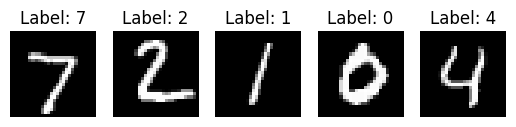

In [ ]:
# Get a random batch from the test loader
images, labels = next(iter(test_loader))

fig, ax = plt.subplots(1, 5)
for i in range(5):
  sample_image = images[i].squeeze()
  sample_label = labels[i].item()

  # Visualize the image
  ax[i].imshow(sample_image, cmap='gray')
  ax[i].set_title(f'Label: {sample_label}')
  ax[i].axis("off")

As you can see, we have a bunch of grayscale images of handwritten digits. These images are 28 x 28 pixels. Alright, let's get into building our first basic neural network!

In [ ]:
# Here, we define the neural network we are going to train
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model
Simple_model = SimpleNN().to(device)

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Simple_model.parameters(), lr=0.01)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    Simple_model.train()
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False):
        # Move data to GPU
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = Simple_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch 1/10:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [1/10], Loss: 0.0212


Epoch 2/10:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [2/10], Loss: 0.0270


Epoch 3/10:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [3/10], Loss: 0.5931


Epoch 4/10:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [4/10], Loss: 0.0389


Epoch 5/10:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [5/10], Loss: 0.0064


Epoch 6/10:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [6/10], Loss: 0.1935


Epoch 7/10:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [7/10], Loss: 0.1456


Epoch 8/10:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [8/10], Loss: 0.0565


Epoch 9/10:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [9/10], Loss: 0.2186


Epoch 10/10:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [10/10], Loss: 0.1685


In [ ]:
# Evaluate the model on the test set
Simple_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        # Move data to GPU
        images, labels = images.to(device), labels.to(device)

        outputs = Simple_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 96.95%


Nice! Our relatively basic neural network, with just one hidden layer and only a few minutes of training, did spectacularly on this dataset. For fun, let's try out a different architecture that Jackson method: a convolutional neural network (CNN).

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

CNN_model = SimpleCNN().to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(CNN_model.parameters(), lr=0.01)

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False):
        optimizer.zero_grad()
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = CNN_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch 1/5:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [1/5], Loss: 0.2896


Epoch 2/5:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [2/5], Loss: 0.4447


Epoch 3/5:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [3/5], Loss: 0.0510


Epoch 4/5:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [4/5], Loss: 0.1518


Epoch 5/5:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch [5/5], Loss: 0.1836


In [ ]:
CNN_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = CNN_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 96.79%


Awesome! This model (hopefully) performed even better! I hope this gives you a nice flavor of why researchers are interested in a wide variety of different kinds of deep learning models. Each kind has its own advantages and disadvantages that makes it well-suited to particular kinds of problems. Factors like speed (performance), training time, ability to generate new data, are all factors that you might use to decide which model to implement to attack a particular problem.

Finally, I want to demonstrate a potential issue that can affect the performance of your models if you aren't careful about how you select your training data. This problem is known as "overfitting".

The testing data you feed your model is always a subset of the total sample. For example, we might feed our models a few tens of thousands of handwritten images that are some small fraction of all the possible digits. If we used a much smaller training set, for example 100 images, our sample might not be a perfect representation of the population. For example, it might be that just be chance, all of the 7s in our sample have a horizontal line through them, or all the 4s open up on top.

If we "overtrain" our model on this sample, it might start to "psych itself out". It will start to fixate on certain features of our sample that might not necessarily always be present in the overall population. Let's demonstrate this by artificially restricting the sample we train on and see how it impacts the results.

Epoch 1/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 2/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 3/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 4/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 5/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 6/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 7/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 8/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 9/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 10/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 11/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 12/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 13/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 14/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 15/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 16/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 17/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 18/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 19/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 20/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 21/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 22/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 23/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 24/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 25/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 26/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 27/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 28/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 29/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 30/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 31/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 32/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 33/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 34/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 35/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 36/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 37/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 38/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 39/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 40/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 41/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 42/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 43/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 44/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 45/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 46/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 47/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 48/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 49/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 50/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 51/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 52/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 53/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 54/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 55/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 56/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 57/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 58/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 59/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 60/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 61/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 62/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 63/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 64/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 65/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 66/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 67/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 68/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 69/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 70/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 71/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 72/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 73/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 74/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 75/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 76/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 77/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 78/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 79/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 80/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 81/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 82/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 83/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 84/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 85/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 86/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 87/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 88/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 89/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 90/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 91/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 92/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 93/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 94/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 95/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 96/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 97/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 98/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 99/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 100/100:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch [100/100], Loss: 0.0001


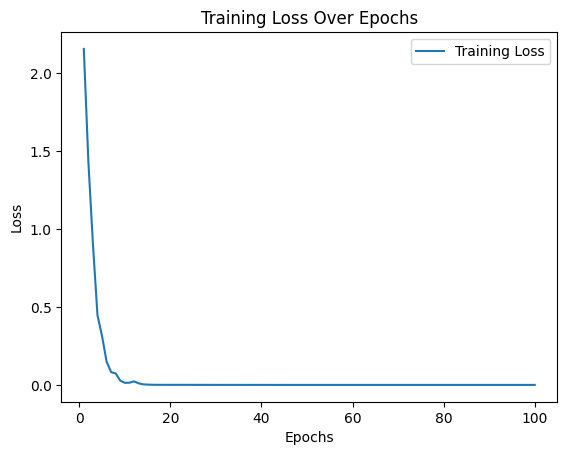

In [ ]:
# Define a smaller subset of the MNIST dataset to encourage overfitting
subset_size = 100
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_subset, _ = torch.utils.data.random_split(train_dataset, [subset_size, len(train_dataset) - subset_size])

# Create a loader for the smaller subset
batch_size = 64
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)

# Instantiate the overfitting model
Overfitting_model = SimpleNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Overfitting_model.parameters(), lr=0.01)

num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    Overfitting_model.train()
    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False):
        optimizer.zero_grad()
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = Overfitting_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the training loss over epochs
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
Overfitting_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = Overfitting_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 71.04%


As you can see, our model did a lot worse here. In this example, it might be due more to the fact that we had a very small sample size and so the model didn't have as much information to go off of. But in general, even if you use a large enough training set, a model can still fall prey to overfitting if you overtrain it.

# Expressiveness and Overfitting

If we have time, we're going to explore this concept of expressiveness and overfitting a little more graphically. We are going to use a basic neural network to fit data. Technically, this isn't a very good problem for deep learning, because you can just do this kind of thing using a procedure like least-squares regression. However, I think it's a good way to demonstrate certain features of deep learning models.

Each model has a certain set of "hyperparameters", which set the architecture and specifications of the model. Examples might be the number of hidden layers, the choice of optimizer, the learning rate, etc. These hyperparameters can often influence how well your model will perform above even the type of model itself or how long you train it for.

Let's try to have a neutral net fit a simple sine curve with some random noise added to it.

In [ ]:
# Generate synthetic dataset
np.random.seed(42)
x = np.linspace(0, 10, 1000)  # Input features
y = 2 * np.sin(x) + np.random.normal(0, 0.5, 1000)  # True underlying function with noise

# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

To see how changing the number of nodes in the hidden layers changes the effectiveness of the model, let's make that an input parameter.

In [ ]:
# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self, hidden_size, input_size=1, output_size=1):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Function to train the model
def train_model(model, x, y, epochs, lr):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        # Forward pass
        outputs = model(x)
        loss = criterion(outputs, y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 1000 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Alright, now let's do some learning! First off, we are going to try to use a very basic model to fit the data. After all, a sine curve is pretty basic, so we might expect that we could pretty efficiently fit it given even a very lightweight model.

Epoch [1000/10000], Loss: 0.9866
Epoch [2000/10000], Loss: 0.9865
Epoch [3000/10000], Loss: 0.9865
Epoch [4000/10000], Loss: 0.9865
Epoch [5000/10000], Loss: 0.9865
Epoch [6000/10000], Loss: 0.9865
Epoch [7000/10000], Loss: 0.9865
Epoch [8000/10000], Loss: 0.9865
Epoch [9000/10000], Loss: 0.9865
Epoch [10000/10000], Loss: 0.9865


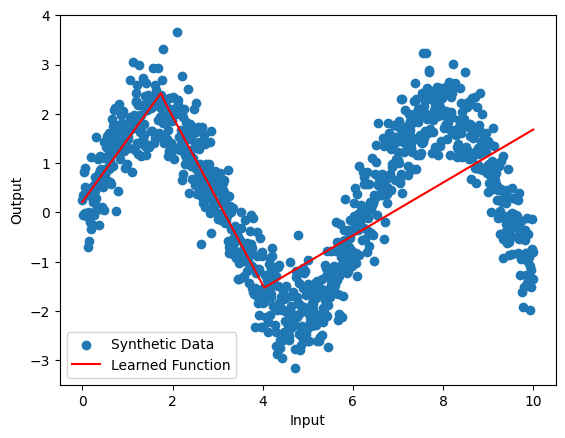

In [ ]:
# Let's start off with a very basic model, only 10 nodes in the hidden layer
Simple_model = SimpleNN(10)
train_model(Simple_model, x_tensor, y_tensor, epochs=10000, lr=0.01)

# Plot the true function and the learned function
with torch.no_grad():
    y_pred = Simple_model(x_tensor)

plt.scatter(x, y, label='Synthetic Data')
plt.plot(x, y_pred.numpy(), color='red', label='Learned Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

Okay, so clearly we were a bit overoptimistic. Our model is not *expressive* enough here to capture all the nuances of the data. We have very few numbers to play with in our hidden layer, so it's difficult to try to take any arbitrary input and map it to a position on the sine curve.

Let's try again, but with more nodes in the hidden layer.

Epoch [1000/10000], Loss: 0.2427
Epoch [2000/10000], Loss: 0.2376
Epoch [3000/10000], Loss: 0.2353
Epoch [4000/10000], Loss: 0.2396
Epoch [5000/10000], Loss: 0.2351
Epoch [6000/10000], Loss: 0.2352
Epoch [7000/10000], Loss: 0.2363
Epoch [8000/10000], Loss: 0.2360
Epoch [9000/10000], Loss: 0.2353
Epoch [10000/10000], Loss: 0.2349


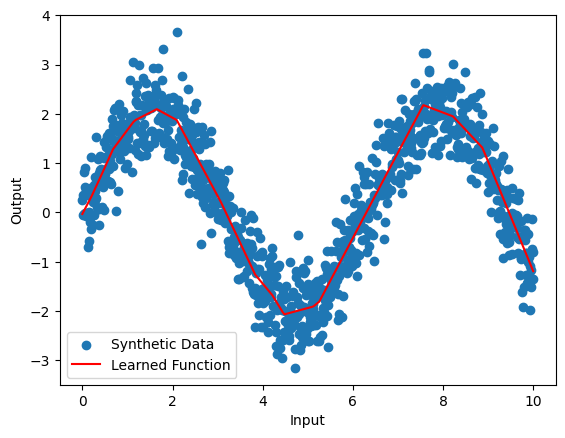

In [ ]:
# Train the model on the entire dataset
Simple_model = SimpleNN(100)
train_model(Simple_model, x_tensor, y_tensor, epochs=10000, lr=0.01)

# Plot the true function and the learned function
with torch.no_grad():
    y_pred = Simple_model(x_tensor)

plt.scatter(x, y, label='Synthetic Data')
plt.plot(x, y_pred.numpy(), color='red', label='Learned Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

Nice! This isn't exactly a smooth since curve, but I think you'll agree that our model pretty well reproduces the data, especially given the noise.

For fun, let's see what happens if we increase the number of notes by another factor of 10.

Epoch [1000/10000], Loss: 0.2496
Epoch [2000/10000], Loss: 0.2344
Epoch [3000/10000], Loss: 0.2323
Epoch [4000/10000], Loss: 0.2319
Epoch [5000/10000], Loss: 0.2313
Epoch [6000/10000], Loss: 0.2722
Epoch [7000/10000], Loss: 0.2307
Epoch [8000/10000], Loss: 0.2346
Epoch [9000/10000], Loss: 0.2308
Epoch [10000/10000], Loss: 0.2293


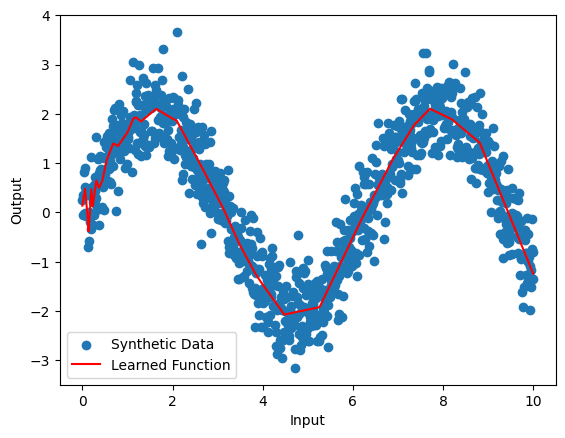

In [ ]:
# Train the model on the entire dataset
Simple_model = SimpleNN(1000)
train_model(Simple_model, x_tensor, y_tensor, epochs=10000, lr=0.01)

# Plot the true function and the learned function
with torch.no_grad():
    y_pred = Simple_model(x_tensor)

plt.scatter(x, y, label='Synthetic Data')
plt.plot(x, y_pred.numpy(), color='red', label='Learned Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

Woah! Now, our model is *too* expressive! It overfitted the data, and started zigging and zagging trying to fit the noise instead of just capturing the basic shape of the data. So it might fit this particular dataset perfectly, but it'll be trash at trying to figure out a more general sine wave.

# Conclusion

Alright, that's all I have for your today! I hope you enjoyed this brief overview of some concepts in deep learning and AI. Please feel free to shoot me a message on slack or email if you have any questions (anshrg@arizona.edu). Best of luck with your future explorations!